# MNIST Digits Classification Using Deep Learning (Neural Network)

## Importing Dependencies

In [28]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from PIL import Image
import cv2
import tensorflow as tf 
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix
tf.random.set_seed(5)
import random

## Loading the MNIST dataset from keras.datasets

In [29]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [30]:
# print the type of data
print(f"X_train type - {type(X_train)}")
print(f"Y_train type - {type(Y_train)}")
print(f"X_test type - {type(X_test)}")
print(f"Y_test type - {type(Y_test)}")

X_train type - <class 'numpy.ndarray'>
Y_train type - <class 'numpy.ndarray'>
X_test type - <class 'numpy.ndarray'>
Y_test type - <class 'numpy.ndarray'>


In [31]:
# print the shape of the numpy arrays
print(f"X_train shape - {X_train.shape}")
print(f"Y_train shape - {Y_train.shape}")
print(f"X_test shape - {X_test.shape}")
print(f"Y_test shape - {Y_test.shape}")

X_train shape - (60000, 28, 28)
Y_train shape - (60000,)
X_test shape - (10000, 28, 28)
Y_test shape - (10000,)


Training data --> 60,000 Images

Testing data --> 10,000 Images

Image dimension --> 28 x 28

Grayscale Image --> 1 channel

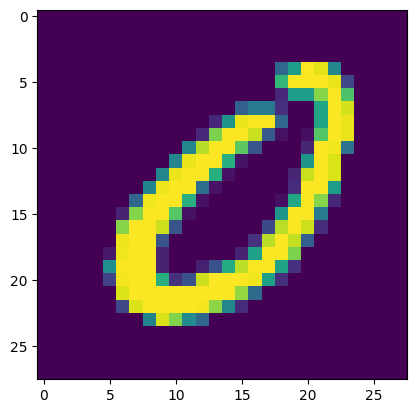

Output : 0


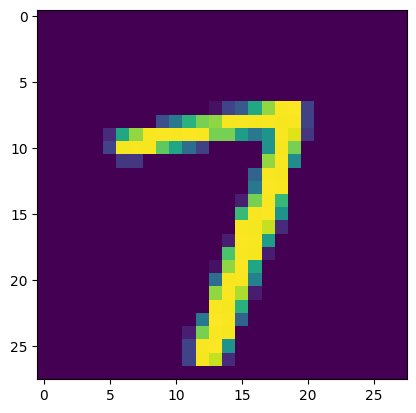

Output : 7


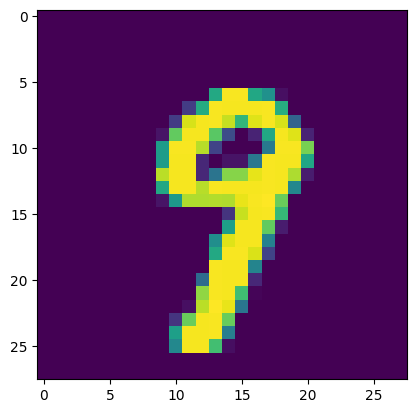

Output : 9


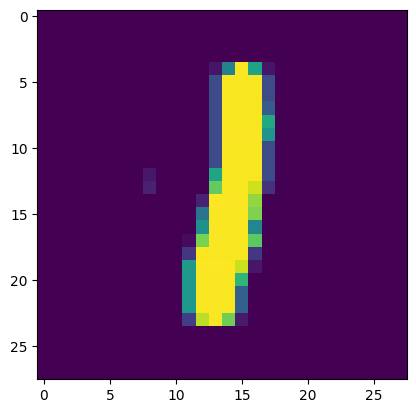

Output : 1


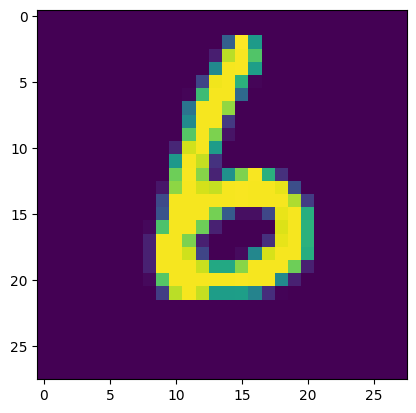

Output : 6


In [32]:
# displaying 5 random images from X_train with their corresponding outputs from Y_train
for i in range(5):
    num = random.randint(1, 60000)
    plt.imshow(X_train[num])
    plt.show()
    print(f"Output : {Y_train[num]}")